In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

# import the required libraries
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from tqdm 

In [2]:
os.listdir('data1')

['test',
 'test_frames_keypoints.csv',
 'training',
 'training_frames_keypoints.csv']

In [3]:
# Load Metadata
keypoints = pd.read_csv("data1/training_frames_keypoints.csv")

In [4]:
keypoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Columns: 137 entries, Unnamed: 0 to 135
dtypes: float64(136), object(1)
memory usage: 3.6+ MB


In [5]:
# Show Sample of Data
keypoints.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [6]:
key_pts_frame = pd.read_csv('data1/training_frames_keypoints.csv')

n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = np.array(key_pts_frame.iloc[n, 1:])
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts: {}'.format(key_pts[:4]))

Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts: [[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


In [7]:
def show_keypoints(image_name, key_pts):
    img = cv2.imread("data1/training/{}".format(image_name), 0)
    """Show image with keypoints"""
    plt.imshow(img)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

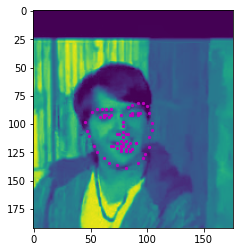

In [8]:
#Example Output 
show_keypoints(image_name, key_pts)

In [46]:
image  = cv2.imread("data1/training/{}".format(image_name), 1)
image.shape
# face Detector
# load in a haar cascade classifier for detecting frontal faces
def detectFaces(image,debug = False):
    """
    Return crop images of the detected faces
    """
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    # run the detector
    # the output here is an array of detections; the corners of each detection box
    # if necessary, modify these parameters until you successfully identify every face in a given image
    faces = face_cascade.detectMultiScale(image, 1.2, 2)    
    croped_images = [] 
    # loop over the detected faces, mark the image where each face is found
    for (x,y,w,h) in faces:
        # Crop 
        print(faces)
        print(image.shape)
        try:
            croped_image = cv2.resize(image[y:y+h, x:x+w], (100, 100))
            croped_images.append(np.expand_dims(croped_image, axis = 0))
        except:
            return None
    return np.concatenate(croped_images,axis = 0)

In [47]:
detectFaces(image).shape

[[43 67 65 65]]
(192, 176, 3)


(1, 100, 100, 3)

In [68]:
def getData(mode = "training"):
    meta_data = pd.read_csv("data1/{}_frames_keypoints.csv".format(mode))
    keypoints = np.array(meta_data[meta_data.columns[1:]])
    names =list(meta_data[meta_data.columns[0]])
    imgs = [] 
    keypoints_index = []
    batch_num = 0
    for i in range(len(names)):
        assert(os.path.isfile("data1/{}/{}".format(mode,names[i])))
        img = cv2.imread("data1/{}/{}".format(mode,names[i]))
        #print("{}: {}".format(i,names[i]))
        img = detectFaces(img)
        print(type(img))
        if(type(img) == None):
            continue
            prin("ji")
        else:
            imgs.append(detectFaces(img))
            keypoints_index.append(i)
    print(imgs)
    return (np.concatenate(imgs,axis =0), keypoints[keypoints_index])

In [69]:
img = cv2.imread("data1/training/Luis_Fonsi_21.jpg")
print(img.shape)

(192, 176, 3)


In [70]:
os.path.isfile("data1/training/Luis_Fonsi_21.jpg")

True

In [71]:
xtrain,ytrain = getData()
xtest,ytest = getData(mode ="test")

[[43 67 65 65]]
(192, 176, 3)
<class 'numpy.ndarray'>


ValueError: need at least one array to concatenate

In [75]:
print("Test: ",xtest.shape)
print("Training: ",xtrain.shape)

Test:  (770, 150, 150, 3)
training:  (3462, 150, 150, 3)


In [15]:
len(image_name)

17

In [72]:
input_shape = (150,150,3)
output_shape = (1,1,136)
base_model = tf.keras.applications.MobileNetV2(
    input_shape= (96,96,3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
)

inputs = tf.keras.Input(input_shape)

base_model_outputs = base_model(inputs)

x = tf.keras.layers.BatchNormalization()(base_model_outputs)
x = tf.keras.layers.Activation( 'relu' )(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = tf.keras.layers.SeparableConv2D( 150 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' )(inputs)
x = tf.keras.layers.SeparableConv2D( 150 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' )(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = tf.keras.layers.SeparableConv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' )(x)
x = tf.keras.layers.SeparableConv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' )(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.SeparableConv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' )(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.SeparableConv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid')(x)
outputs = tf.keras.layers.GlobalMaxPooling2D()(x)

model = tf.keras.Model(inputs,outputs)
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , 
              metrics=[ 'mse' ] )
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
separable_conv2d_36 (Separab (None, 148, 148, 150)     627       
_________________________________________________________________
separable_conv2d_37 (Separab (None, 147, 147, 150)     23250     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 150)       0         
_________________________________________________________________
separable_conv2d_38 (Separab (None, 73, 73, 136)       21136     
_________________________________________________________________
separable_conv2d_39 (Separab (None, 72, 72, 136)       19176     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 136)       0   

/home/trex/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [77]:
model.fit( xtrain , ytrain , epochs=25 , batch_size=10 , validation_data=( xtest , ytest ))


Epoch 1/25
347/347 [==============================] - 497s 1s/step - loss: 12592.0898 - mse: 12592.0898 - val_loss: 12513.6836 - val_mse: 12513.6836
Epoch 2/25
347/347 [==============================] - 535s 2s/step - loss: 12570.4795 - mse: 12570.4795 - val_loss: 12513.6582 - val_mse: 12513.6582
Epoch 3/25
337/347 [============================>.] - ETA: 14s - loss: 12522.3027 - mse: 12522.3027

KeyboardInterrupt: 